## Import modules needed

In [105]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [106]:
cars_header = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors',
               'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
               'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system',
               'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
               'price']
cars = pd.read_csv('imports-85.data', names=cars_header)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [107]:
# Remove non-numeric, non-continuous cols from dataframe
continuous_cols = ['normalized_losses', 'wheel_base', 'length', 
                   'width', 'height', 'curb_weight', 'bore', 
                   'stroke', 'compression_ratio', 'horsepower', 
                   'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

numeric_cars = cars[continuous_cols].copy()
numeric_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [108]:
# Replace "?" values with NaNs
numeric_cars.replace(to_replace='?', value=np.nan, inplace=True)
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [109]:
# Cast all numeric columns data to float
numeric_cars = numeric_cars.astype(float)
numeric_cars.dtypes

normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

In [110]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [111]:
# Drop missing prices as this is the column I am trying to predict
numeric_cars = numeric_cars.dropna(subset=['price'], axis=0)
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [112]:
# Replace all other NaNs with column mean values
numeric_cars.fillna(numeric_cars.mean(), inplace=True)
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [113]:
# Normalize all columns so that all values range from 0 to 1
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [114]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate k-nearest neighbors model

In [115]:

def knn_train_test(train_col_name, target_col_name, df):
    # Randomize order of Dataframe rows
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide dataframe into the training and testing set, respectively
    last_train_row = int(len(random_df) / 2)
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor()
    
    # Fit univariate KNN model using default k value.
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    # Make predictions using model.
    predictions = knn.predict(test_df[[train_col_name]])
    
    # Calculate and return root-mean-square error (RSME)
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse
    

In [116]:
rmse_results = dict()
train_cols = numeric_cars.columns.drop('price')

# For each column except 'price', train a model, return RMSE value
# and add to the `rmse_results` dictionary

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_value

# Convert into Series object from dictionary and sort

rmse_results_series = pd.Series(rmse_values)
rmse_results_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [117]:
# Modified function to test different k values
def knn_train_test(train_col_name, target_col_name, df):
    # Randomize order of Dataframe rows
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide dataframe into the training and testing set, respectively
    last_train_row = int(len(random_df) / 2)
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # vary the hyperparameter value 
    k_values = [1, 3, 5, 7, 9]
    k_rmses = dict()
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # Fit model using k nearest neighbors.
        knn.fit(train_df[[train_col_name]], train_df[target_col_name])
        
        # Make predictions using the model.
        predictions = knn.predict(test_df[[train_col_name]])
        
        # Calculate  root-mean-square error (RSME) for each k,
        # store each value in dictionary, and return.
        mse = mean_squared_error(test_df[target_col_name], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    
    return k_rmses

In [118]:
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column except 'price', train a model, return RMSE value
# and add to the dictionary 'k_rmse_results'.
for col in train_cols:
    k_rmse_value = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = k_rmse_value
    
k_rmse_results



{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city_mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb_weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway_mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.4555

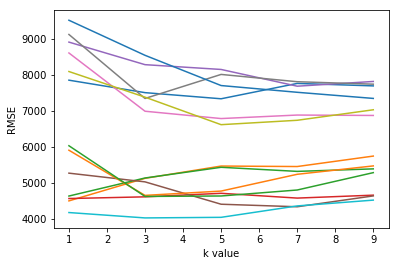

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.show()


## Multivariate Model

In [120]:
# Calculate average RMSE value across different `k` values for each feature.
feature_avg_rmse = dict()

for k, value in k_rmse_results.items():
    avg_rmse = np.mean(list(value.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [122]:
# Modified function to test multiple training columns
def knn_train_test(train_cols, target_col_name, df):
    # Randomize order of Dataframe rows
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide Dataframe into the training and testing set, respectively
    last_train_row = int(len(random_df) / 2)
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # Set the k value to 5.
    k_values = [5]
    rmses = dict()
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col_name])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate  root-mean-square error (RSME) for each k,
        # store each value in dictionary, and return.
        mse = mean_squared_error(test_df[target_col_name], predictions)
        rmse = np.sqrt(mse)
        rmses[k] = rmse
    return rmses

In [123]:
k_rmse_results = dict()

# Use best two features to train and test a multivariate 
# k-nearest neighbors model using default k value
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_val

# Use best three features to train and test a multivariate 
# k-nearest neighbors model using default k value
three_best_features = ['horsepower', 'width', 'highway_mpg']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val


# Use best four features to train and test a multivariate 
# k-nearest neighbors model using default k value
four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

# Use best five features to train and test a multivariate 
# k-nearest neighbors model using default k value
five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

# Use best six features to train and test a multivariate 
# k-nearest neighbors model using default k value
six_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val


In [124]:
k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3631.5953374038613},
 'two best features': {5: 3589.3132622073304}}

In [125]:
# Modified function to test multiple training columns & test different k values
def knn_train_test(train_cols, target_col_name, df):
    # Randomize order of Dataframe rows
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide Dataframe into the training and testing set, respectively
    last_train_row = int(len(random_df) / 2)
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # Vary the hyperparameter value k from 1 to 25.
    k_values = list(range(1,26))
    rmses = dict()
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col_name])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate  root-mean-square error (RSME) for each k,
        # store each value in dictionary, and return.
        mse = mean_squared_error(test_df[target_col_name], predictions)
        rmse = np.sqrt(mse)
        rmses[k] = rmse
    return rmses

In [126]:
k_rmse_results = dict()
top_3_models = {'five best features': five_best_features, 
                'two best features': two_best_features, 
                'four best features': four_best_features}

for model in top_3_models.keys():
    rmse_val = knn_train_test(top_3_models[model], 'price', numeric_cars)
    k_rmse_results[model] = rmse_val
    

In [127]:
k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467,
  25: 4923.8448430324688},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.62666

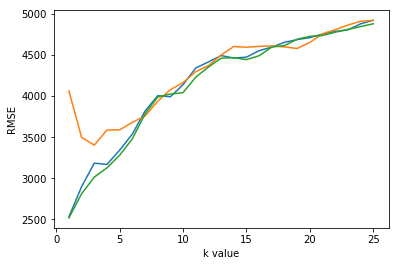

In [128]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')